In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('D:\Jupyter Notebook\customer churn prediction\data\customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [19]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
df['InternetService']= df['InternetService'].fillna("")

In [6]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Churn (yes/no)')

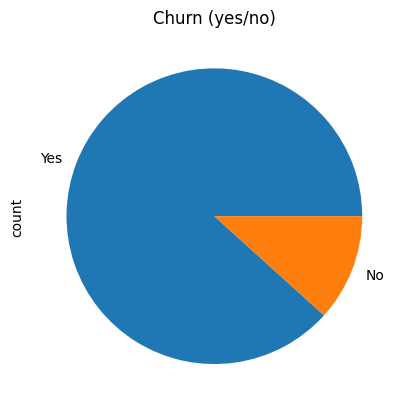

In [8]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (yes/no)")

In [86]:
df.groupby("Churn")['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [87]:
df.groupby(["Churn","Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     0         65.091912
       1         59.013878
Yes    0         74.975064
       1         77.082518
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'ContractType vs MonthlyCharge')

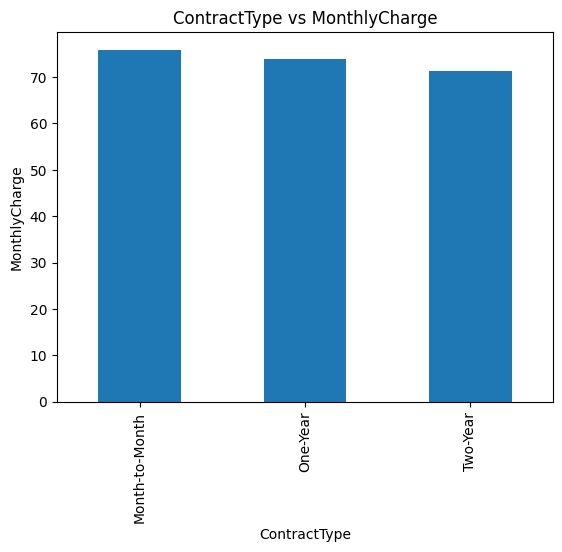

In [88]:
df.groupby("ContractType")['MonthlyCharges'].mean().plot(kind="bar")
plt.xlabel("ContractType")
plt.ylabel("MonthlyCharge")
plt.title("ContractType vs MonthlyCharge")

Text(0.5, 1.0, 'Histogram of Monthly charges')

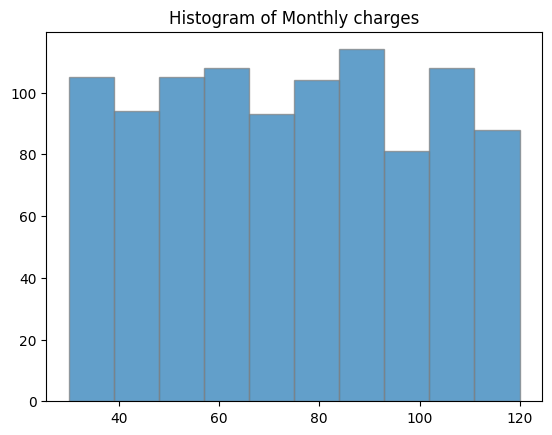

In [90]:
plt.hist(df['MonthlyCharges'], alpha=0.7, edgecolor='grey')
plt.title("Histogram of Monthly charges")

(array([490., 233., 127.,  64.,  36.,  30.,  13.,   2.,   4.,   1.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

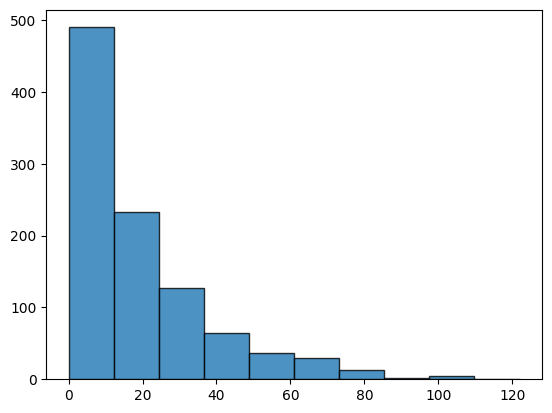

In [91]:
plt.hist(df["Tenure"], alpha=0.8, edgecolor= 'black')

In [9]:
df["Gender"]=df["Gender"].map({"Male":1, "Female":0})
X= df[["Age", "Gender", "Tenure", "MonthlyCharges"]]
X

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01
...,...,...,...,...
995,42,1,41,37.14
996,62,1,9,80.93
997,51,0,15,111.72
998,39,1,68,65.67


In [10]:
y= df["Churn"]
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: object

In [11]:
y= y.apply(lambda x: 1 if x=="Yes" else 0)
y.value_counts()

Churn
1    883
0    117
Name: count, dtype: int64

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train.isna().sum()

Age               0
Gender            0
Tenure            0
MonthlyCharges    0
dtype: int64

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_train= X_train_scaled

In [15]:
import joblib

In [16]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [17]:
scaled_X_test=scaler.transform(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model= LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred=log_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay


In [24]:
Accuracy = accuracy_score(y_test, y_pred)
Accuracy

0.885

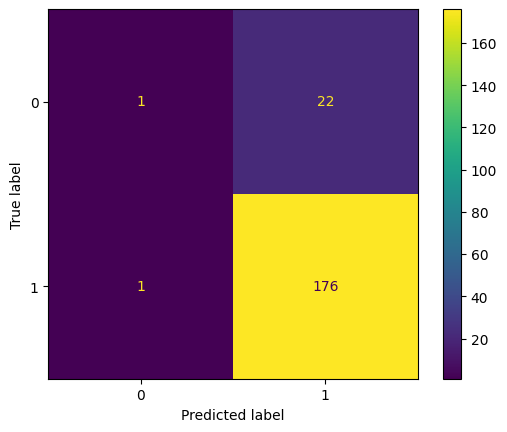

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

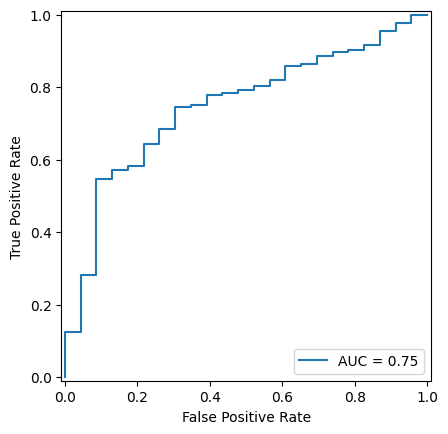

In [26]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
param_grid={"n_neighbors":[3,5,9],"weights":["uniform", "distance"]}   
gridkn=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridkn.fit(X_train_scaled, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [29]:
gridkn.best_params_
y_pred=gridkn.predict(scaled_X_test)
y_pred
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.88


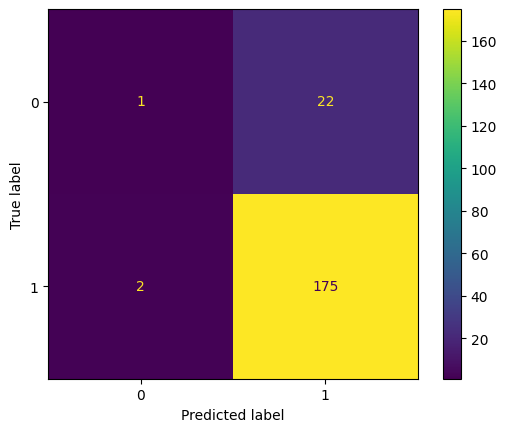

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

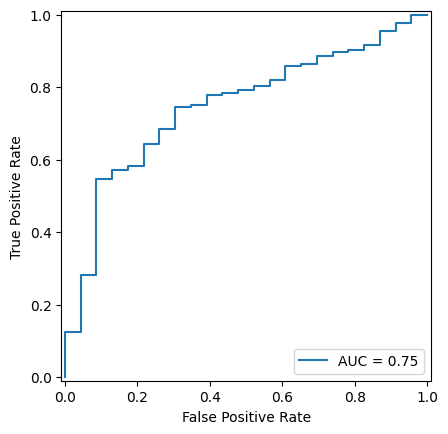

In [31]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [32]:
from sklearn.svm import SVC
svc= SVC()

In [33]:
param_grid={"C":[0.01, 0.1,0.03,0.07], "kernel":["linear","rbf", "poly"]}

In [34]:
gridsvc= GridSearchCV(svc, param_grid, cv=5)

In [35]:
gridsvc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [36]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [37]:
y_pred= gridsvc.predict(scaled_X_test)

In [38]:
print("Accuracy: ", accuracy_score(y_test, y_pred)) 

Accuracy:  0.885


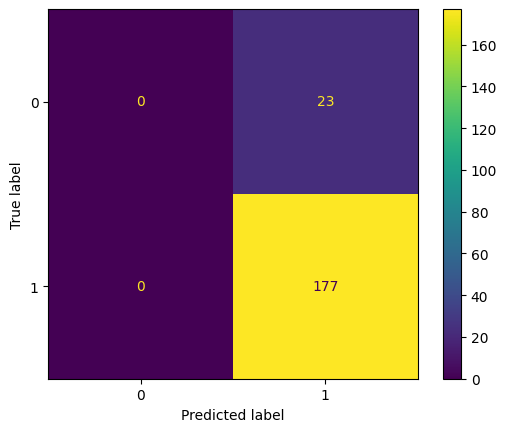

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

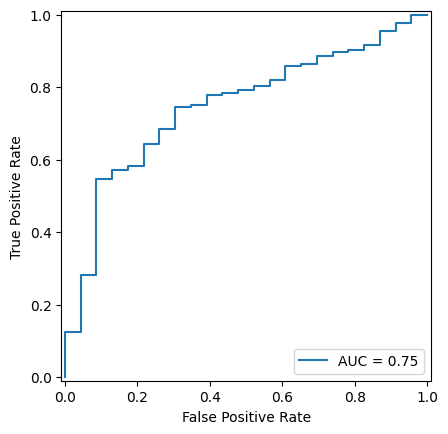

In [40]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [41]:
from sklearn.tree import DecisionTreeClassifier


In [42]:
param_grid = {
    'criterion': ['gini', 'entropy'],         # or 'log_loss' in newer versions
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [43]:
grid_tree= GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)

In [44]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [45]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [46]:
y_pred= grid_tree.predict(scaled_X_test)

In [47]:
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.885


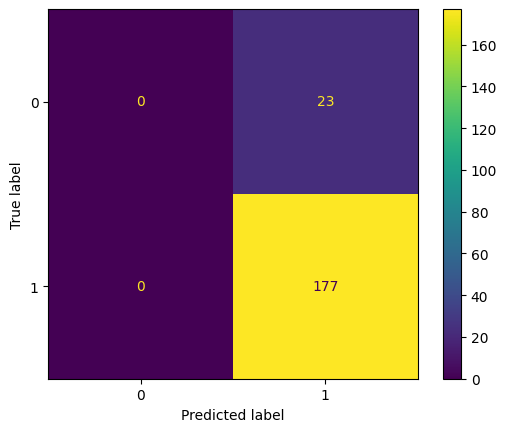

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

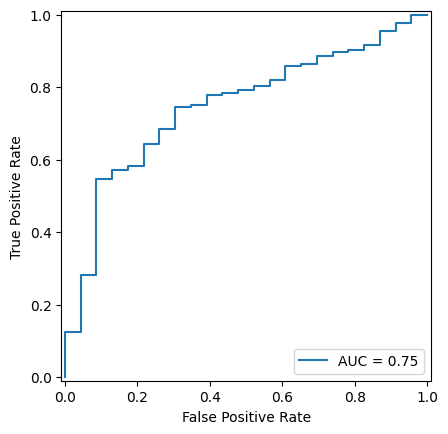

In [49]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': [2,3,4],
    'bootstrap': [True, False]
}


In [52]:
grid_rf = GridSearchCV(rfc, param_grid, cv=5)
grid_rf.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [53]:
grid_rf.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 300}

In [54]:
y_pred=grid_rf.predict(scaled_X_test)

In [55]:
print("ACCuracy: ", accuracy_score(y_test, y_pred))

ACCuracy:  0.87


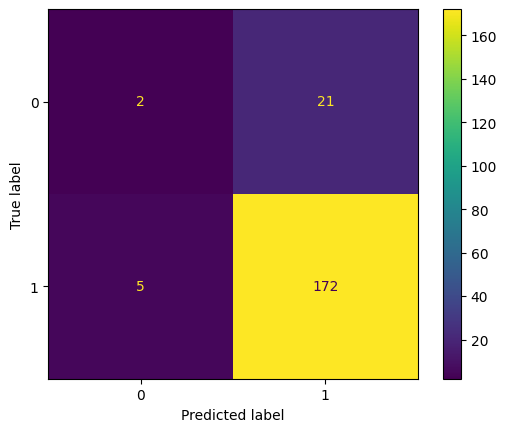

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

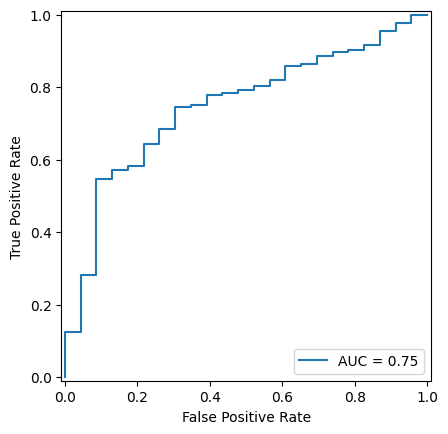

In [57]:
y_proba = log_model.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [60]:
results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    print(f"  Accuracy: {accuracy:.4f}")

print("\n✅ All models trained successfully!")

Training Logistic Regression...
  Accuracy: 0.8750
Training Random Forest...
  Accuracy: 0.8850
Training Gradient Boosting...


d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


  Accuracy: 0.8850
Training XGBoost...
  Accuracy: 0.8850

✅ All models trained successfully!


d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
d:\Jupyter Notebook\customer churn prediction\.venv_new\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:43:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [61]:
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.set_index('Model')

# Round to 4 decimal places
comparison_df = comparison_df.round(4)

# Sort by F1-Score (most important for imbalanced classification)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\n📊 Model Comparison Table:")
print("=" * 70)
comparison_df


📊 Model Comparison Table:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Random Forest,0.885,0.8850,1.0000,0.939,0.5068
Gradient Boosting,0.885,0.8850,1.0000,0.939,0.4040
XGBoost,0.885,0.8850,1.0000,0.939,0.5226
Logistic Regression,0.875,0.8878,0.9831,0.933,0.7159


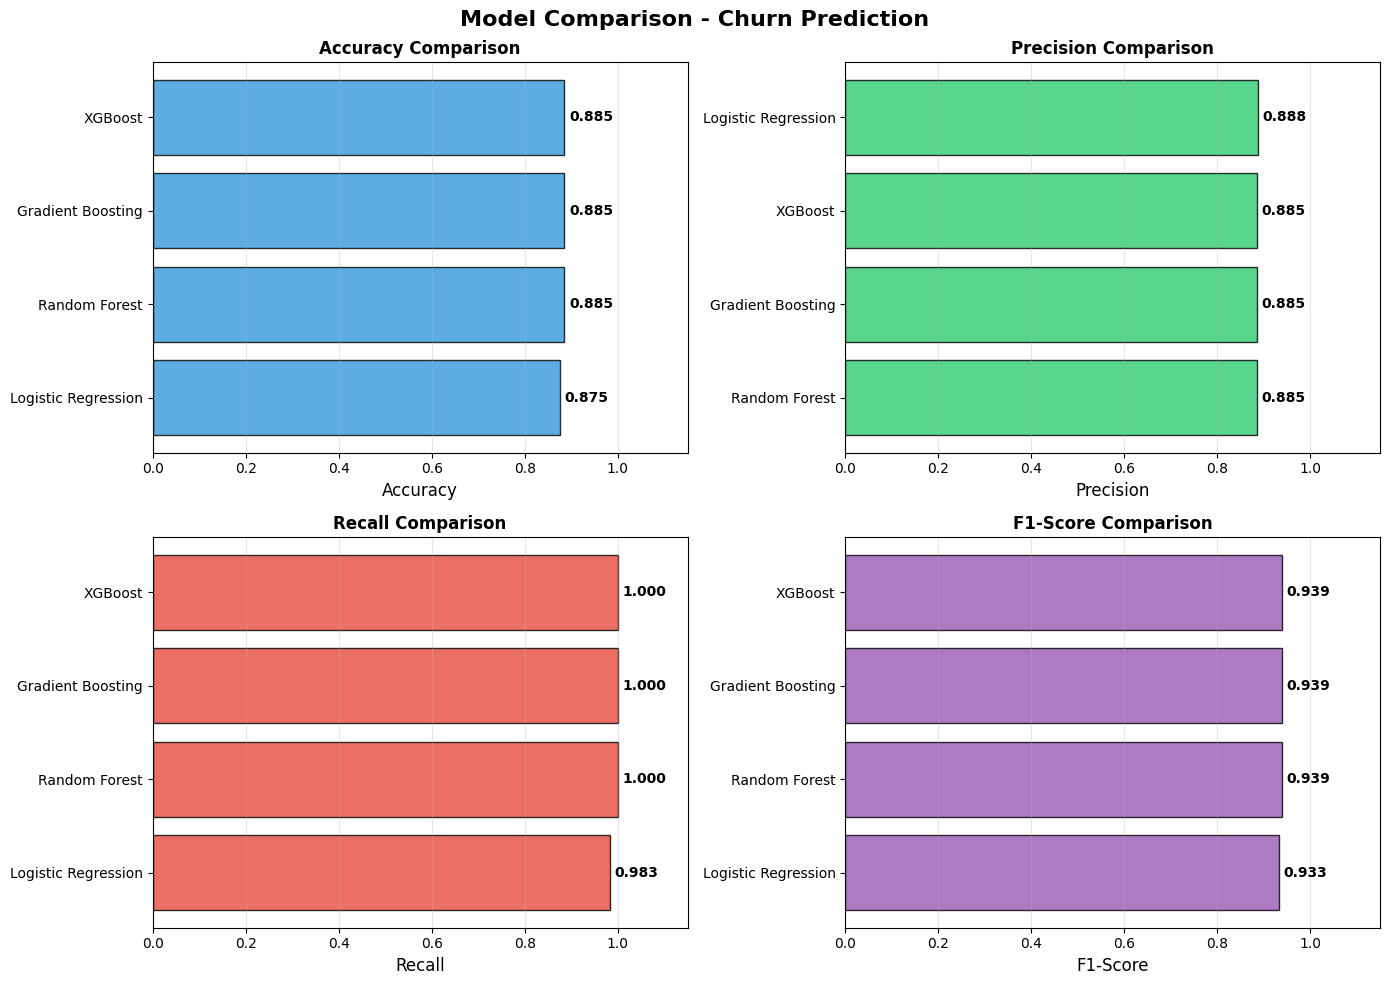


📈 Chart saved as 'model_comparison.png'


In [62]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison - Churn Prediction', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

for idx, (ax, metric) in enumerate(zip(axes.flatten(), metrics)):
    data = comparison_df[metric].sort_values(ascending=True)
    bars = ax.barh(data.index, data.values, color=colors[idx], edgecolor='black', alpha=0.8)
    
    # Add value labels on bars
    for bar, val in zip(bars, data.values):
        ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{val:.3f}', va='center', fontweight='bold')
    
    ax.set_xlabel(metric, fontsize=12)
    ax.set_xlim(0, 1.15)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📈 Chart saved as 'model_comparison.png'")


In [63]:
best_model_name = comparison_df['F1-Score'].idxmax()
best_f1 = comparison_df.loc[best_model_name, 'F1-Score']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"\n💡 Recommendation: Use {best_model_name} for production deployment!")



🏆 Best Model: Random Forest
   F1-Score: 0.9390

💡 Recommendation: Use Random Forest for production deployment!


In [64]:
best_model=models[best_model_name]

In [65]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [68]:
import json
real_metrics = {
    "accuracy": results[0]["Accuracy"],
    "f1_score": results[0]["F1-Score"],
    "roc_auc": results[0]["ROC-AUC"],
    "Precision": results[0]["Precision"],
    "Recall": results[0]["Recall"],
    "features_count": X_train.shape[1]  # Automatically counts your features (4)
}

# 3. Save these numbers to a file that Streamlit can read
# Make sure to save it in the same folder as your .pkl files
with open('models/metrics.json', 'w') as f:
    json.dump(real_metrics, f)

print("✅ Metrics saved to models/metrics.json")

✅ Metrics saved to models/metrics.json
